## Energy efficiency Data Set: **Multi Output Model**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input

%matplotlib inline

In [2]:
# Data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)
df.drop(labels=['Unnamed: 10', 'Unnamed: 11'], axis= 1, inplace= True)
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.62,808.5,367.5,220.5,3.5,3,0.40,4,16.90,16.79
1,0.90,563.5,318.5,122.5,7.0,5,0.10,2,27.90,34.20
2,0.64,784.0,343.0,220.5,3.5,5,0.25,5,16.92,20.29
3,0.69,735.0,294.0,220.5,3.5,4,0.10,1,11.09,14.30
4,0.69,735.0,294.0,220.5,3.5,4,0.40,3,14.33,16.99


In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [5]:
# Get train & test sets
x = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = df[['Y1', 'Y2']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8
60,0.82,612.5,318.5,147.0,7.0,5,0.25,1
618,0.64,784.0,343.0,220.5,3.5,3,0.25,5
346,0.62,808.5,367.5,220.5,3.5,3,0.10,1
294,0.79,637.0,343.0,147.0,7.0,2,0.10,2
231,0.69,735.0,294.0,220.5,3.5,4,0.40,5


In [6]:
y_train.head()

,Y1,Y2
60,26.19,31.39
618,16.86,20.01
346,12.97,14.50
294,35.65,41.07
231,14.37,16.54


In [7]:
x_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8
668,0.76,661.5,416.5,122.5,7.0,3,0.10,1
324,0.64,784.0,343.0,220.5,3.5,2,0.10,2
624,0.76,661.5,416.5,122.5,7.0,2,0.00,0
690,0.74,686.0,245.0,220.5,3.5,2,0.25,1
473,0.69,735.0,294.0,220.5,3.5,3,0.00,0


### Get the numpy arrays for labels

In [8]:
# Train_y

y1 = y_train['Y1']
y1 = np.array(y1)
y2 = y_train['Y2']
y2 = np.array(y2)
train_y = (y1,y2)
train_y[0][:5]

array([26.19, 16.86, 12.97, 35.65, 14.37])

In [9]:
# Test_y
y1 = y_test['Y1']
y1 = np.array(y1)
y2 = y_test['Y2']
y2 = np.array(y2)
test_y = (y1,y2)
test_y[0][:5]

array([32.12, 15.41, 24.77, 12.43,  6.79])

### Stats for normalization

In [10]:
# Statistics for train set

train_stats = x_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.766954,0.106653,0.62,0.69,0.76,0.86,0.98
X2,614.0,669.360749,88.406884,514.50,588.00,661.50,735.00,808.50
X3,614.0,318.380293,43.506097,245.00,294.00,318.50,343.00,416.50
X4,614.0,175.490228,45.321985,110.25,122.50,147.00,220.50,220.50
X5,614.0,5.289902,1.750971,3.50,3.50,7.00,7.00,7.00
X6,614.0,3.522801,1.106986,2.00,3.00,4.00,4.75,5.00
X7,614.0,0.237052,0.133069,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.802932,1.529031,0.00,2.00,3.00,4.00,5.00


### Training set normalization

In [11]:
# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']

In [12]:
norm_train_x = (x_train - x_train.mean())/x_train.std()
norm_test_x = (x_test - x_test.mean())/x_test.std()

norm_train_x.head()

,X1,X2,X3,X4,X5,X6,X7,X8
60,0.497366,-0.643171,0.002751,-0.628618,0.976657,1.334433,0.097302,-1.179133
618,-1.190349,1.296723,0.565891,0.993111,-1.022234,-0.472275,0.097302,1.436902
346,-1.377873,1.573851,1.129030,0.993111,-1.022234,-0.472275,-1.029935,-1.179133
294,0.216080,-0.366043,0.565891,-0.628618,0.976657,-1.375629,-1.029935,-0.525124
231,-0.721539,0.742468,-0.560388,0.993111,-1.022234,0.431079,1.224539,1.436902


## Build Model

In [13]:
input_layer = Input(shape=(len(x_train.columns), ))
first_dense = Dense(units = 128, activation = 'relu')(input_layer)
second_dense = Dense(units= 128, activation='relu')(first_dense)

y1_output = Dense(units = 1, name='y1_output')(second_dense)
third_dense = Dense(units=64, activation = 'relu')(second_dense)

y2_output = Dense(units= 1, name='y2_output')(third_dense)

model = keras.models.Model(inputs=input_layer, outputs=[y1_output, y2_output])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
_______________________________________________________________________________________

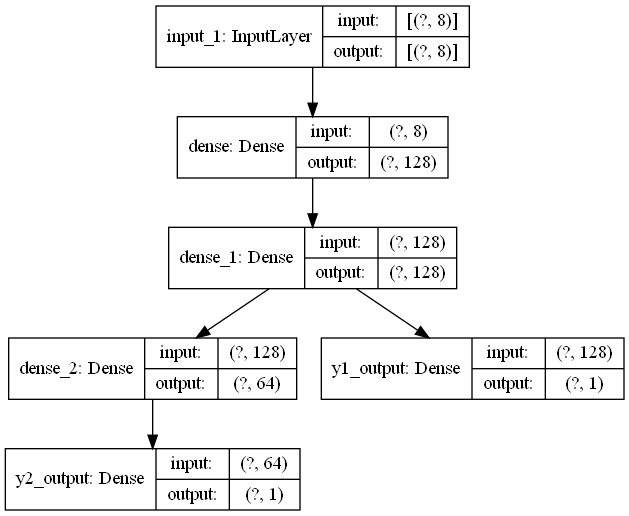

In [14]:
keras.utils.plot_model(model, show_shapes=True)

### Compile & Run the model

In [15]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate=0.001), 
              loss= {'y1_output': 'mse', 'y2_output': 'mse'}, 
              metrics= {'y1_output': keras.metrics.RootMeanSquaredError(), 
                        'y2_output': keras.metrics.RootMeanSquaredError()})

In [16]:
history = model.fit(norm_train_x, train_y,
                    epochs= 500,batch_size= 10,
                    validation_data=(norm_test_x, test_y),
                    verbose = 1)

Epoch 1/500
62/62 [==============================] - 1s 10ms/step - loss: 234.3485 - y1_output_loss: 109.6129 - y2_output_loss: 124.7356 - y1_output_root_mean_squared_error: 10.4696 - y2_output_root_mean_squared_error: 11.1685 - val_loss: 76.1938 - val_y1_output_loss: 18.8637 - val_y2_output_loss: 57.3301 - val_y1_output_root_mean_squared_error: 4.3432 - val_y2_output_root_mean_squared_error: 7.5717
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 30.4441 - y1_output_loss: 12.2796 - y2_output_loss: 18.1645 - y1_output_root_mean_squared_error: 3.5042 - y2_output_root_mean_squared_error: 4.2620 - val_loss: 32.9218 - val_y1_output_loss: 13.8144 - val_y2_output_loss: 19.1074 - val_y1_output_root_mean_squared_error: 3.7168 - val_y2_output_root_mean_squared_error: 4.3712
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 25.6964 - y1_output_loss: 10.0802 - y2_output_loss: 15.6161 - y1_output_root_mean_squared_error: 3.1749 - y2_output_root_mean_s

In [18]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(norm_test_x, test_y)
print("\n\nLoss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 1ms/step - loss: 3.6874 - y1_output_loss: 1.8551 - y2_output_loss: 1.8323 - y1_output_root_mean_squared_error: 1.3620 - y2_output_root_mean_squared_error: 1.3536


Loss = 3.687441349029541, Y1_loss = 1.8551019430160522, Y1_mse = 1.3620213270187378, Y2_loss = 1.8323396444320679, Y2_mse = 1.3536393642425537


### Plotting results

In [19]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

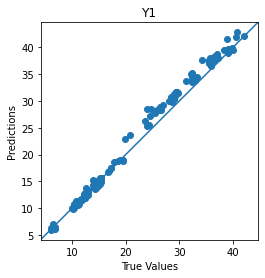

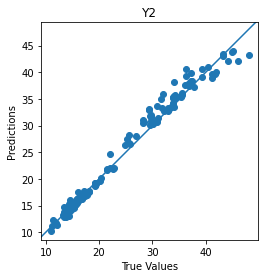

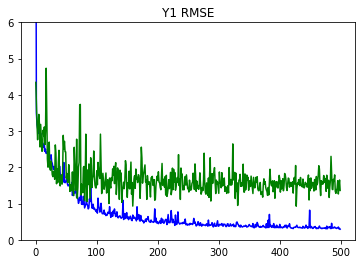

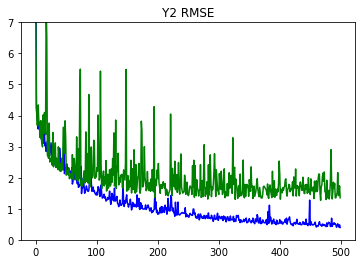

In [22]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_x)
plot_diff(test_y[0], Y_pred[0], title='Y1')
plot_diff(test_y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)